## Материалы
* [Дашборд] (https://public.tableau.com/app/profile/aleksei.sonin/viz/Book2_16544365023150/sheet1)
* [Презентация] (https://drive.google.com/file/d/18NjKXyJ0bL3PAmA3IzAvAvjYjKvFOnWT/view?usp=sharing)

In [25]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mth

# Введение



**Исследование клиентов регионального банка**

---
**Описание исследования:**

Анализ оттока клиентов, который покажет, как клиенты пользуются услугами банка, а так же поможет составить портрет клиентов, которые склонны уходить.

**Цель исследования.**

1) выделить сегменты, склонные к оттоку;    
2) предложить меры по снижению оттока;  
3) проверить статистические гипотезы.  
---

**Задачи исследования.**

- Изучить источник данных;
- Выполнить предобработку, если это необходимо;
- Провести исследовательский анализ;
- Выделить портреты пользователей;
- Сформулировать и проверить статистические гипотезы

---

**Исходные данные.**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

`userid` — идентификатор пользователя;  
 
`score` — баллы кредитного скоринга;  

`City` — город; 

`Gender` — пол;  

`Age` — возраст;  

`Objects` — количество объектов в собственности;  

`Balance` — баланс на счёте;  

`Products` — количество продуктов, которыми пользуется клиент;  

`CreditCard` — есть ли кредитная карта:


`Loyalty` — активный клиент;  

`estimated_salary` — заработная плата клиента;  

`Churn` — ушёл или нет;  


---
**План работы**

Часть 1. Изучение данных.
Открываем файл и ознакамливаемся с данными и их структурой.

Часть 2. Предобработка и подготовка данных к анализу.

Часть 3. Исследовательский анализ. 
    Изучение распределений признаков по выборке.
    Портрет клиентов, склонных к уходу из банка.

Часть 4. Проверка гипотез.
    Сравнение среднего дохода клиентов, попавших в отток и оставшихся.
    Сравнение долей клиентов, оформивших кредитную карту среди ушедших и оставшихся.

Часть 5. Вывод. 

## Изучение данных

Составим первое впечатление о данных. Считаем датасет и сохраним его в переменной `df`. Выведем на экран 20 случайных строк и общую информацию о таблице.

In [26]:
df = pd.read_csv(***)
print(df.info())
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
2574,15731427,665,Ростов Великий,Ж,51,9,110610.41,2,0,1,1112.76,1
9777,15820479,705,Ярославль,Ж,39,3,92224.56,1,1,1,54517.25,0
5371,15623437,712,Ярославль,М,33,3,153819.58,1,1,0,79176.09,1
1778,15791683,657,Ярославль,Ж,41,5,95858.37,1,1,1,68255.88,0
1793,15820658,629,Рыбинск,М,36,1,161757.87,2,1,1,146371.72,0
8664,15709068,690,Рыбинск,Ж,48,2,NaN,2,1,1,3149.10,0
7507,15684737,576,Ростов Великий,М,44,9,119530.52,1,1,0,119056.68,1
8354,15712730,556,Ростов Великий,Ж,31,1,128663.81,2,1,0,125083.29,0
9198,15713002,499,Ярославль,Ж,28,4,141792.61,1,1,1,22001.91,0
4200,15794679,529,Рыбинск,Ж,43,5,NaN,2,0,0,79476.63,0


В столбце с балансом видны пропуски, посчитаем сколько процентов они составляют от всего столбца:

In [27]:
df.Balance.isna().sum()/df.shape[0]*100 

36.17

Датасет содержит данные о клиентах банка.   
Данные представлены на 10000  строках в 12 столбцах. Типы данных указаны корректно. 
В столбце `Balance` пропущено 3617 значений, что превышает 36% от общего количества. В остальных столбцах пропуски отсутствуют.
Названия столбцов лучше привести к змеиному регистру.

### Вывод

Можно утверждать, что, данных достаточно для анализа. Выявлены пропуски.

Необходимо более детально изучить данные и избавиться от проблем, прежде чем приступить к анализу.

## Предобработка данных

Почти все столбцы написаны с большой буквы и у двух столбцов два слова написаны слитно. Проще будет заменить буквы всех столбцов на строчные, а затем уже добавить нижнее подчёркивание:

In [28]:
df.columns = df.columns.str.lower()
df.rename(columns={'userid':'user_id', 'creditcard':'credit_card'}, inplace=True)
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

Код отработал корректно. 

---
Проверим дубликаты:

In [29]:
df.duplicated().sum()

0

Дубликатов не обнаружено. Теперь посмотрим на данные с пропусками в столбце с балансом:

In [30]:
df.query('balance.isna()').head(20)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,54724.03,0


В первых 20 значениях таблицы с пропусками видны только два города из трёх - отсутствует Ростов Великий. Проверим, есть ли пропуски с этого города во всём датасете: 

In [31]:
df.query('balance.isna() and city=="Ростов Великий"').shape

(0, 12)

В данных клиентов из Ростова Великого пропусков нет. Посмотрим, какая доля пропусков в каждом из двух других городов:

In [32]:
print(len(df.query('balance.isna() and city=="Ярославль"')) / len(df.query('city=="Ярославль"')))
len(df.query('balance.isna() and city=="Рыбинск"')) / len(df.query('city=="Рыбинск"'))

0.48224970083765456


0.4840532902704885

И в Ярославле и в Рыбинске пропуски составляют 48%, очень похоже на системную ошибку. Возможно, данные пользователей этих двух городов хранятся в одной базе/таблице и подгружаются некорректно. Необходимо обратиться с этим вопросом к инженерам, ответственным за выгрузку. 

---
Мы не можем быть уверены в том, что пропуски означают нулевой баланс, заполнение значений средним или медианой по столбцу также исказит распределения. Количество пропущенных значений слишком велико для удаления, самым правильным вариантом тут видится оставить пропуски без изменения.

### Вывод

По ходу предобработки:
- Дубликатов не обнаружено  
- Названия столбцов заменены корректными
- Пропуски решено оставить без изменений

## Исследовательский анализ данных

### Изучение распределений признаков по выборке

Перед построением графиков посмотрим на распределения признаков в таблице при помощи функции `describe()`:

In [33]:
df.drop('user_id', axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Что можно сказать о данных уже сейчас:
* Минимальное количество баллов кредитного скоринга - 350, максимальное - 850. У среднего клиента их примерно 650.
* Средний возраст клиента банка - 39 лет, самому возрастному - 92 года.
* Среднее количество объектов в собственности у клиента - 5, максимальное - 10.
* Минимальный баланс - 3 768р, максимальный - 250 898, средний - почти 120 тыс. рублей.
* В среднем на каждого клиента приходится полтора продукта банка, максимальное количество продуктов по выборке - 4.
* Кредитные карты есть у 70% выборки.
* Активными являются больше половины клиентов.
* Средняя зарплата по выборке - около ста тысяч рублей, максимальная - около двухсот.
* Ушедших клиентов 20% от выборки.

Сразу же бросается в глаза минимальный ежемесячный доход - 11,58 р. в месяц. Установим логический порог минимального среднемесячного дохода - 10000р. Посмотрим на несколько наблюдений с уровнем зп ниже порогового и посчитаем количество таких наблюдений в выборке:

In [34]:
print(df.query('estimated_salary<10000').shape)
df.query('estimated_salary<10000').head(10)

(508, 12)


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
16,15780188,653,Ростов Великий,М,58,1,132602.88,1,1,0,5097.67,1
23,15768473,669,Ярославль,М,46,3,NaN,2,0,1,8487.75,0
58,15666680,511,Рыбинск,Ж,66,4,NaN,1,1,0,1643.11,1
84,15781487,493,Ярославль,Ж,46,4,NaN,2,1,0,1907.66,0
99,15675795,413,Ярославль,М,34,9,NaN,2,0,0,6534.18,0
126,15713873,549,Ярославль,Ж,52,1,NaN,1,0,1,8636.05,1
139,15683641,579,Рыбинск,Ж,35,1,129490.36,2,0,1,8590.83,1
149,15837149,416,Ярославль,М,32,0,NaN,2,0,1,878.87,0
172,15693758,480,Ростов Великий,М,44,10,129608.57,1,1,0,5472.70,1
179,15668162,754,Ростов Великий,Ж,55,3,161608.81,1,1,0,8080.85,1


Количество пропусков от общего размера выборки составляет 5%. Учитывая баланс счёта первых 10 значений, ситуация выглядит неправдоподобно. В данном случае причиной таких значений может выступать нежелание клиентов раскрывать реальный уровень своего дохода. Учитывая малый размер таких наблюдений, будет лучше удалить их из выборки чтобы не искажать распределения и результаты анализа.

In [35]:
df = df.query('estimated_salary>10000')

Сравним средние значения признаков ушедших клиентов и действующих:

In [36]:
df.drop('user_id', axis=1).groupby('churn').mean()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,652.035336,37.441371,5.051350,119610.502282,1.543012,0.708444,0.554394,104846.354352
1,645.319215,44.825413,4.949897,120715.311277,1.475207,0.702479,0.362603,106489.401823


Разница в средних значениях практически по всем признакам невелика - значимые различия наблюдаются только в двух столбцах:
* возрасте: 37 лет среднему 'оставшемуся' клиенту и почти 45 лет 'ушедшему'
* активности: 55% активных клиентов у оставшихся и 36% у ушедших.
---

Теперь посмотрим на графики распределения признаков. Для этого воспользуемся циклом:

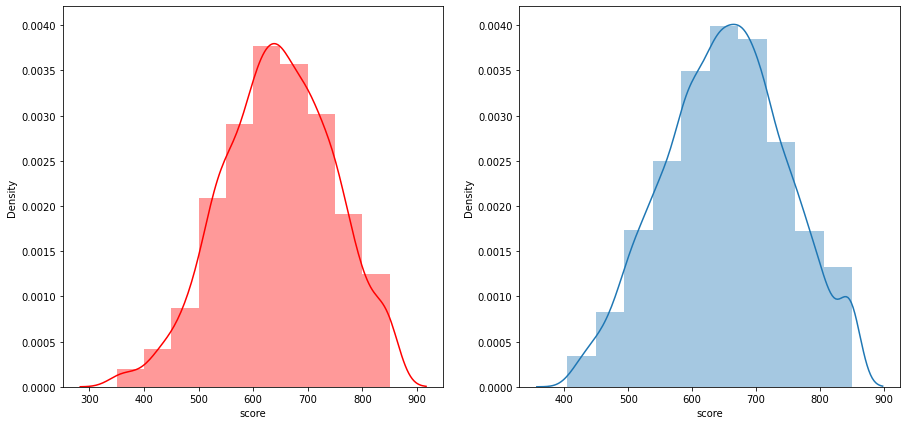

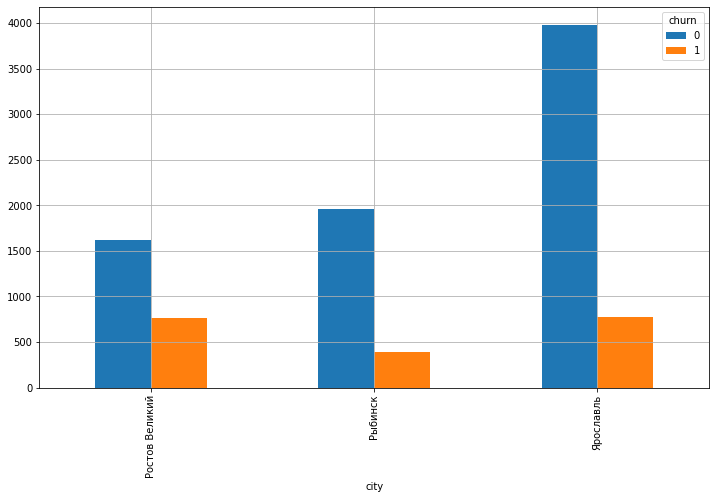

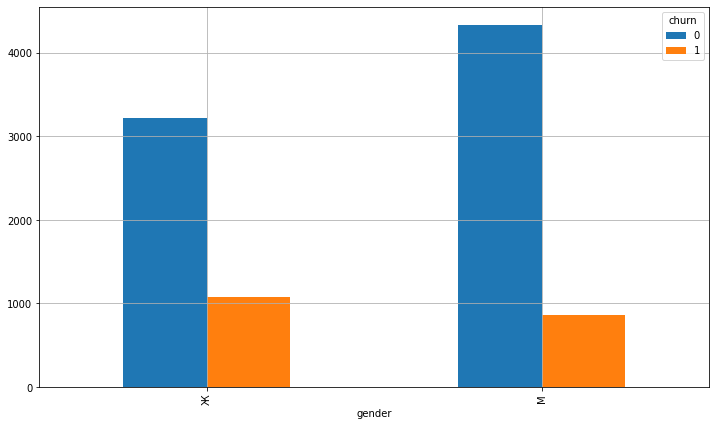

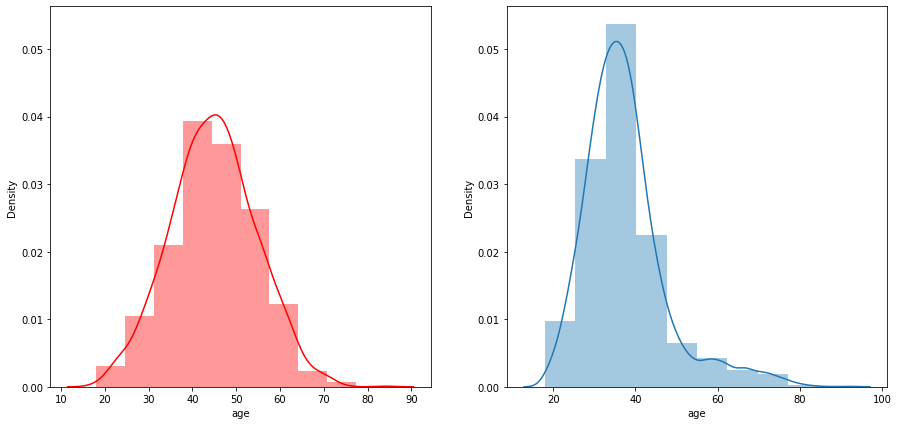

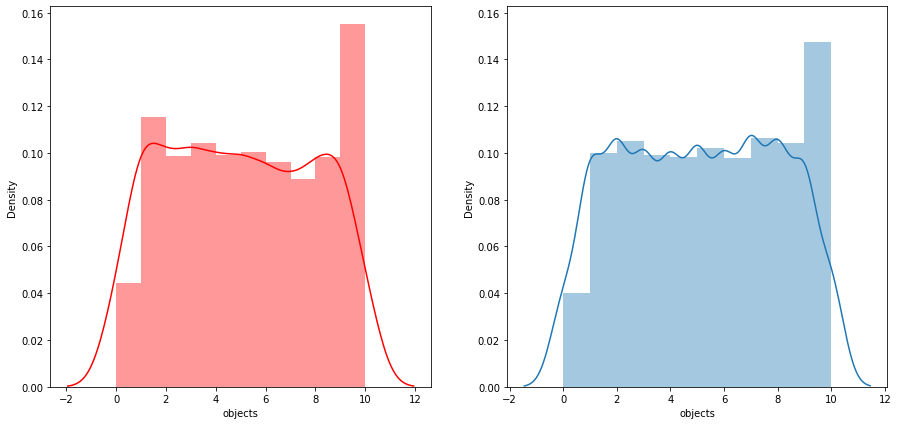

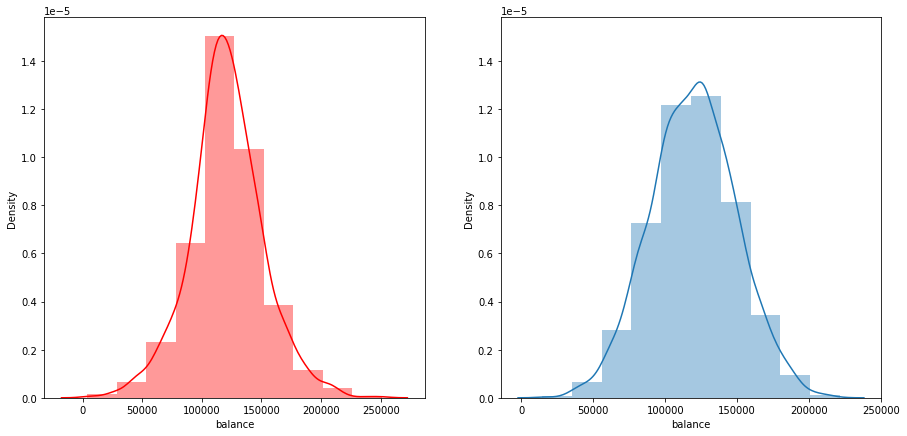

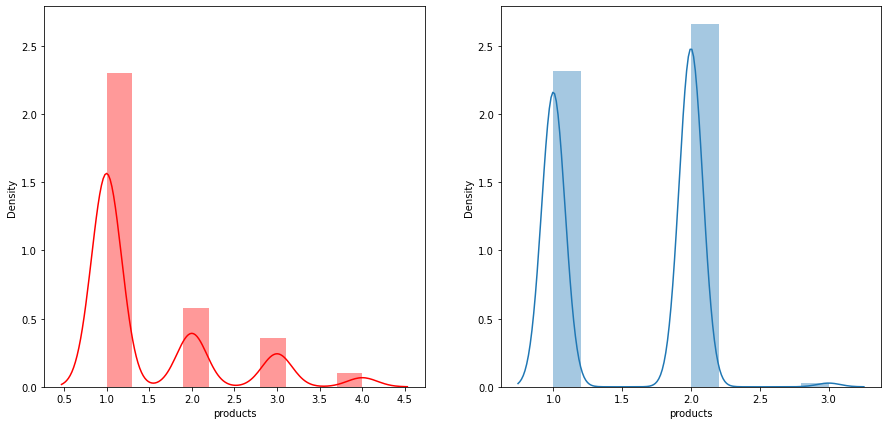

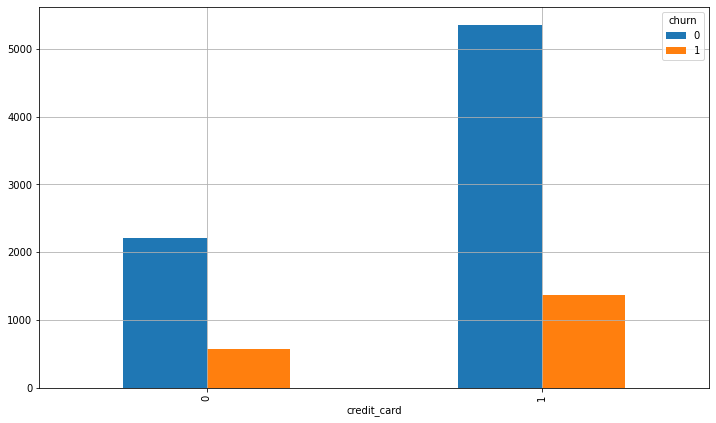

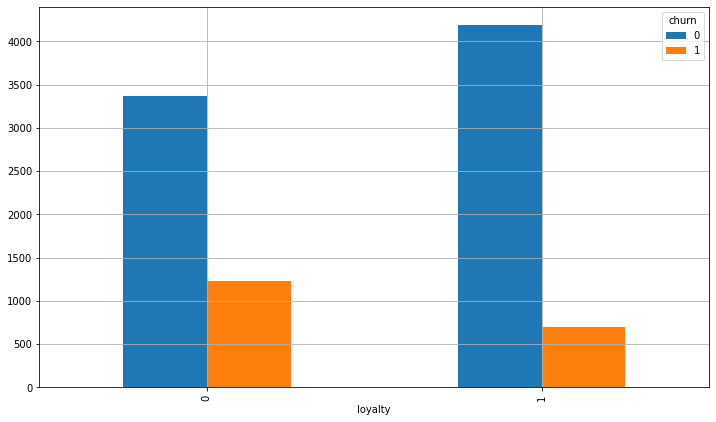

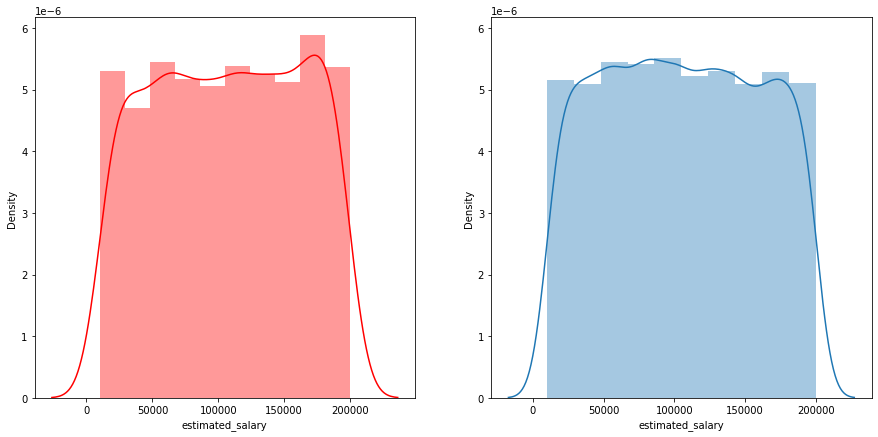

In [37]:
for i in df.drop(['churn','user_id'], axis=1).columns:
    if len(df[i].unique())>3:
        plt.figure(figsize=(15,7))
        plt.subplot(121)
        sns.distplot(df.query('churn==1')[i],label='Ушедшие клиенты', color='red', bins=10)
        plt.subplot(122,sharey=plt.subplot(121))
        sns.distplot(df.query('churn==0')[i],label='Оставшиеся клиенты', bins=10)
        plt.show()
    else:
        df.reset_index().pivot_table(index=i, columns='churn', values='index', aggfunc='count').plot(kind='bar', grid=True, figsize=(12,7))

По графикам можно увидеть:
- Распределения баллов кредитного скоринга в двух группах выглядят схоже, имеют пики в одинаковых диапазонах(примерно 650 баллов) и похожи на нормальные. Небольшой разницей является более тяжёлый 'клюв' и ушедших клиентов и более тяжёлый 'хвост' у оставшихся, т.е. в группе ушедших больше клиентов с низким количеством баллов, а у оставшихся - с высоким.  


- Больше всего действующих клиентов в Ярославле(примерно 4200) - больше чем суммарно в двух других городах. На втором месте по количеству(примерно 2000) стоит город Рыбинск, меньше всего(примерно 1700 клиентов) в Ростове Великом.  Ушедших клиентов примерно поровну в Ярославле(800)  и Ростове Великом(850), Рыбинск на третьем месте (примерно 450).  Можно заметить большую долу ушедших в городе Ростов Великий.


- Среди действующих клиентов больше мужчин (4800 против 3200 женщин), а среди ушедших - женщин( примерно 1100 против 900). По этому распределению можно заметить что ушли из банка примерно четверть всех женщин датасета. 


- Распределение по возрасту у действующих клиентов сдвинуто влево по сравнению с ушедшими. Пиковые значения приходятся примерно на 45 лет у ушедших и на 35 у действующих. Можно сказать что ушедшие клиенты старше оставшихся.  


- Распределения объектов собственности выглядят без сильных изменений, единственное что можно заметить - среди ушедших клиентов больше людей с 2 объектами в собственности и меньше людей с 8мью, чем у действующих.  


- Распределения по количеству банковских продуктов отличаются значительно: среди ушедших подавляющее большинство клиентов имеет 1 продукт, примерно в 4 раза меньше людей с 2мя, ещё меньше с 3мя и очень мало клиентов с 4 продуктами. Среди действующих клиентов больше всего людей с 2мя продуктами, примерно на 10% меньше людей с одним, очень мало с тремя и совсем нет с четырьмя. Можно сказать что клиенты, имеющие больше двух банковских продуктов склонны к уходу.  


- Клиентов, оформивших кредитную карту больше в обоих группах примерно в одинаковой пропорции. 


- Ожидаемо среди действующих клиентов больше активных (примерно 4800 против 3600), а среди ушедших наоборот (примерно 1300 неактивных против 800).  


- Распределения по доходу не имеют значимых различий.  


### Портреты клиентов, склонных к уходу из банка

Построим тепловую карту с матрицей корреляции признаков. Для начала переведём город клиента в числовой вид, иначе его не будет на мартрице корреляции. Для этого воспользуемся функцией `get_dummies`.

In [38]:
s = pd.Series(df.city)
df[['Ростов Великий', 'Рыбинск', 'Ярославль']]=pd.get_dummies(s)
df.head(5)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,Ростов Великий,Рыбинск,Ярославль
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,0,0,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,0,0,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,0,1,0


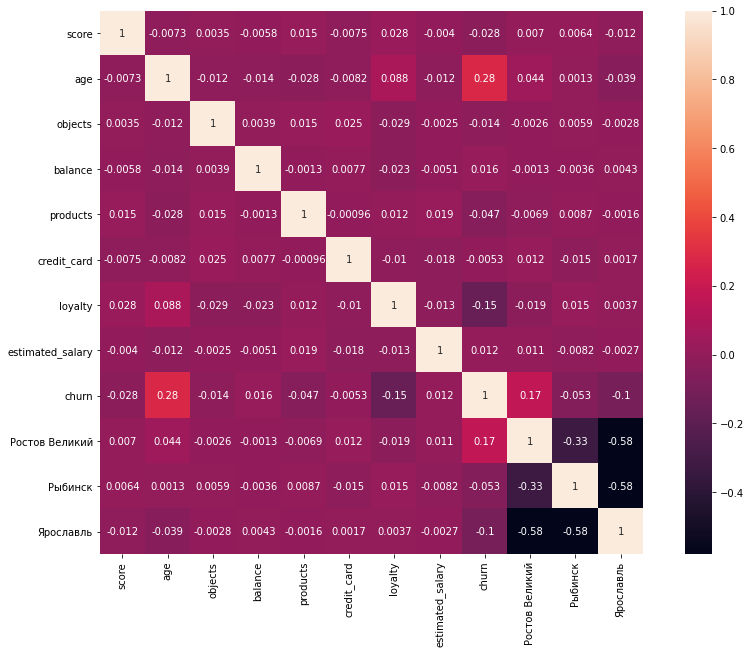

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['user_id', 'city'], axis=1).corr(), square=True, annot=True)
plt.show()

Значимой линейной зависимости между целевым показателем - уходом из банка и остальными признаками не обнаружено. Сильнее всего(28%) на уход влияет возраст, проживание клиента в Ростове Великом(17%) и активность, точнее её отсутствие(-15%).

Начнём выделять портреты клиентов, склонных к уходу. Для этого сделаем срезы данных по параметрам, в распределениях которых больше всего ушедших клиентов. Сильнее всего бросаются в глаза владельцы 3х и 4х банковских продуктов. Построим сводную таблицу по количеству продуктов на клиента со средним значением ушедших пользователей:

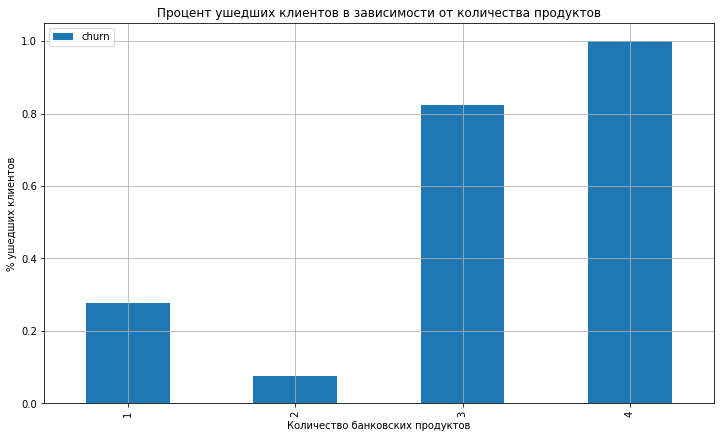

,churn
products,
1,0.276583
2,0.077011
3,0.824701
4,1.000000


In [40]:
df.groupby(by='products').agg({'churn':'mean'}).plot(kind='bar', grid=True,figsize=(12,7))
plt.xlabel('Количество банковских продуктов')
plt.ylabel('% ушедших клиентов')
plt.title('Процент ушедших клиентов в зависимости от количества продуктов')
plt.show()
df.groupby(by='products').agg({'churn':'mean'})

82% клиентов, которые имели 3 банковских продукта и все(!) клиенты, пользовавшиеся 4мя продуктами ушли. На это определённо стоит обратить внимание и разобраться в вопросе более детально. Возможно в продуктах были/есть технические проблемы, либо они уступают схожему пакету продуктов у банков-конкурентов и клиенты уходят к ним.  
Самые лояльные клиенты имеют 2 продукта, доля ушедших среди них меньше 8%, доля ушедших клиентов с одним продуктом - почти 28%.

---


Следующий сегмент можно выделить среди жителей города Ростов Великий в возрасте от 40 до 50 лет с низкой активностью. Посмотрим на распределение ушедших и оставшихся клиентов на графике и посчитаем среднее количество ушедших:

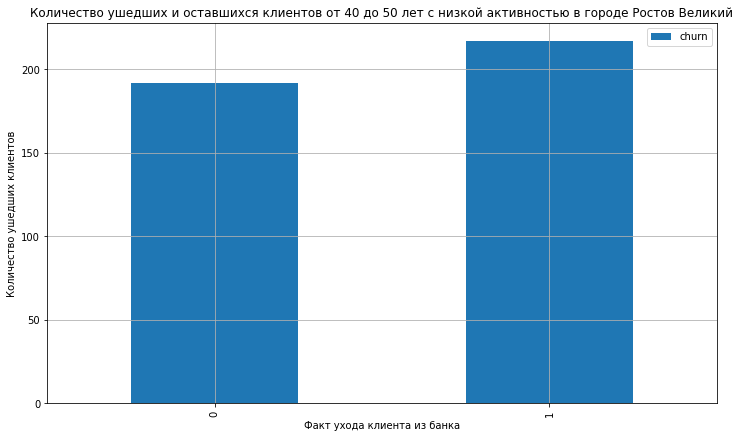

Процент ушедших клиентов клиентов в возрасте от 40 до 50 лет с низкой активностью в городе Ростов Великий: 53.06%


In [41]:
df.query('city=="Ростов Великий" and loyalty==0 and age<=50 and age>=40').groupby('churn').agg({'churn':'count'}).plot(kind='bar', grid=True,figsize=(12,7))
plt.xlabel('Факт ухода клиента из банка')
plt.ylabel('Количество ушедших клиентов')
plt.title('Количество ушедших и оставшихся клиентов от 40 до 50 лет с низкой активностью в городе Ростов Великий')
plt.show()
print('Процент ушедших клиентов клиентов в возрасте от 40 до 50 лет с низкой активностью в городе Ростов Великий: {:.2%}'.format(df.query('city=="Ростов Великий" and loyalty==0 and age<=50 and age>=40').churn.mean()))

Больше половины клиентов данного сегмента ушли из банка. Причина, возможно, также в сильных продуктах банков - конкурентов в этом городе. Как вариант удержания таких клиентов можно рассмотреть предложения банковских продуктов, соответствующих интересам указанной возрастной категории, например, инвестиционные инструменты, либо карты с кешбеком на определённые товарные группы, часто встречающиеся в покупках.

---
Последним сегментом можно выделить женщин с низкой активностью банковского счёта в возрасте также от 40 до 50 лет. Посмотрим на распределение и процент ушедших в указанной группе:

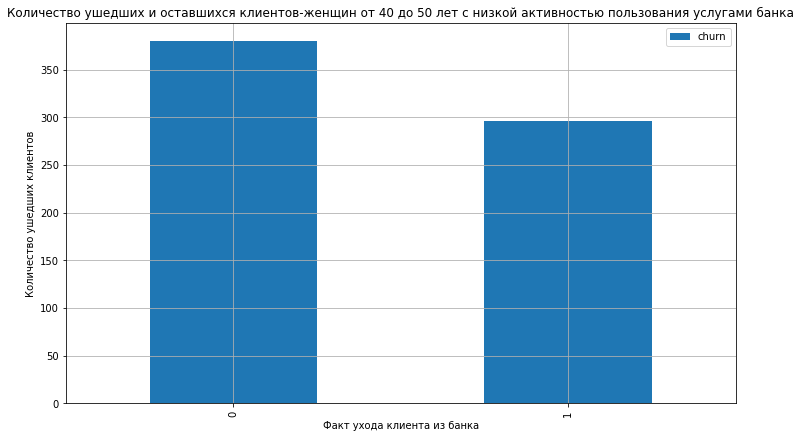

Процент ушедших клиентов клиентов-женщин от 40 до 50 лет с низкой активностью пользования услугами банка: 43.79%


In [42]:
df.query('gender=="Ж" and loyalty==0 and age<=50 and age>=40').groupby('churn').agg({'churn':'count'}).plot(kind='bar', grid=True,figsize=(12,7))
plt.xlabel('Факт ухода клиента из банка')
plt.ylabel('Количество ушедших клиентов')
plt.title('Количество ушедших и оставшихся клиентов-женщин от 40 до 50 лет с низкой активностью пользования услугами банка')
plt.show()
print('Процент ушедших клиентов клиентов-женщин от 40 до 50 лет с низкой активностью пользования услугами банка: {:.2%}'.format(df.query('gender=="Ж" and loyalty==0 and age<=50 and age>=40').churn.mean()))

Почти 44% клиентов указанного сегмента покинули банк. Для удержания также можно рассмотреть предложения кэшбека на товары для женщин и банковские продкуты этой тематики.

### Вывод

- В ходе исследовательского анализа из выборки были удалены наблюдения с доходом менее 10 000 рублей. 
- Отсутствует выраженная корреляция между фактом ухода из банка и остальными параметрами.
- Были выявлены три сегмента, склонных к уходу:  
1) Владельцы трёх и четырёх банковских продуктов (82% и 100% клиентов ушло).  
2) Жители Ростова Великого в возрасте от 40 до 50 лет с низким уровнем активности на счёте (53% клиентов ушло).  
3) Женщины от 40 до 50 лет с низким уровнем активности на счёте (44% клиентов ушло).   

Можно приступать к проверке статистических гипотез.

## Проверка гипотез

### Сравнение среднего дохода клиентов, попавших в отток и оставшихся

Сформулируем нулевую и альтернативную первую статистическую гипотезы:  

* Нулевая гипотеза - средний ежемесячный доход ушедших и оставшихся клиентов равен.  
* Альтернативная гипотеза - средний доход ушедших и оставшихся клиентов различается.

Поскольку столбец с зарплатами не содержит выбросов, можно сразу переходить к тесту.  
Зададим критический уровень статистической значимости в 0.05.  

In [43]:
results = st.ttest_ind(df.query('churn==0')['estimated_salary'], df.query('churn==1')['estimated_salary'], equal_var=False)

alpha = .05 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.2396252353637028
Не получилось отвергнуть нулевую гипотезу


Уровень значимости почти 24%. Это означает, что такую разницу в среднем значении можно получить в каждом четвёртом эксперименте. Можно утвержтать что в среднем доходе двух групп нет достоверных различий.

### Сравнение долей клиентов, оформивших кредитную карту среди ушедших и оставшихся

Сформулируем  нулевую и альтернативную гипотезы для второй проверки:

Нулевая гипотеза - доля клиентов, оформивших кредитные карты среди ушедших и оставшихся одинакова.
Альтернативная гипотеза - доля клиентов, оформивших кредитные карты среди ушедших и оставшихся различна.
Проведём z-test.  
Зададим критический уровень статистической значимости в 0.05.

In [44]:

alpha = .05 # критический уровень статистической значимости

successes_1 = len(df.query('churn==0 and credit_card==1'))
successes_2 = len(df.query('churn==1 and credit_card==1'))

trials_1 = len(df.query('churn==0'))

trials_2 = len(df.query('churn==1'))

# пропорция успехов в первой группе:
p1 = successes_1/trials_1

# пропорция успехов во второй группе:
p2 = successes_2/trials_2

# пропорция успехов в комбинированном датасете:
p_combined = (successes_1 + successes_2) / (trials_1 + trials_2)

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials_1 + 1/trials_2))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / trials_1 + 1 / trials_2)
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.6068629456438372
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


### Вывод

- Оба предположения не удалось подвтердить. Уровень статистической значимости обеих гипотез слишком большой, чтобы опровергнуть нулевые гипотезы.  
- Нет статистически значимой разницы между ушедшими и оставшимися клиентами как в доходе, так и в доле оформивших кредитные карты.


## Финальный вывод и рекоммендации

- Во время изучения данных было обнаружено 36% пропуско в столбце с балансом счёта клиентов. При изучении пропусков было обнаружено, что они присутствуют только по двум городам из трёх, причём в каждом городе их по 48%. Необходимо передать информацию ответственным за выгрузку специалистам на предмет проверки системной ошибки. Во время предобработки названия столбцов были приведены к змеиному регистру.


- Среднему клиенту в выборке 39 лет, у него 650 баллов кредитного скоринга, 5 объектов в собственности, примерно 120 000 рублей на счету, а средняя зарплата - примерно 100 000 рублей. В среднем на каждого клиента приходится полтора банковских продукта, больше половины клиентов активны, 7 из 10 оформляют кредитную карту и пятая часть датасета покинула банк.


- Из выборки были удалены 5% пользователей с подозрительно низким ежемесячным доходом - меньше 10 000 рублей. Возможно это также ошибка при выгрузке данных, либо часть клиентов намеренно указала заниженный доход.


- Разница в средних значениях между ушедшими и оставшимися клиентами наблюдается только в возрасте(37 лет в среднем оставшемуся и 45 - ушедшему) и активности (55% оставшихся клиентов активны и 36% среди ушедших).


- Владельцы двух банковских продуктов - самые лояльные клиенты, доля ухода всего 7%. Доля ушедших среди владельцев одного продукта - 27%.


- Были выделены три портрета клиентов, максимально слонных к уходу из банка:  
1) Владельцы трёх и четырёх банковских продуктов (82% и 100% клиентов ушло).  
2) Жители Ростова Великого в возрасте от 40 до 50 лет с низким уровнем активности на счёте (53% клиентов ушло).  
3) Женщины от 40 до 50 лет с низким уровнем активности на счёте (44% клиентов ушло).   


- Нет статистически значимой разницы между доходом и долей оформивших кредитную карту между ушедшими и оставшимися клиентами.
___

**В связи с выявленными закономерностями были сформулированы следующие рекоммендации для удержания потенциально склонных к уходу клиентов:**

- Выяснить причину огромного процента среди ушедших клиентов, которые пользовались тремя и четырьмя банковскими продуктами. Проверить технические несиправности в продуктах банка и условия схожих продуктов у банков - конкурентов.

- Подготовить предложения для жителей Ростова Великого возрастной категории 40-50 лет с низким показателем активности. Предложением могут быть инвестиционные или накопительные инструменты, карты с повышенным кешбеком на покупки, либо путешествия.

- Также подготовить предложения для клиентов - женщин возрастом от 40 до 50 лет с низким уровнем активности. Как вариант- кешбек на покупку товаров для дома, косметики, путешествий, инвестиционные инструменты.

- Предложить клиентам с одним банковским продуктом завести второй, учитывая их интересы, т.к. по статистики предоставленных данных это снизит вероятность ухода примерно на 20%.

---
Исследование можно считать завершённым.